# Introduction to Python Fundamentals

## Focus on Python for finance and also trading
- Portfolio Allocatiotn
- Sharpe Ratio
- Portfolio Optimization
- Efficient Frontier
- CAPM or Captital Asset Pricing Model

Market mechanics, order mechanics and general arbitrage opportunities.

### Portfolio Statistics

A portfolio is just a set of allocations in a variety of securites

These perecentage should add up to 100% or as weights they should add up to 1.

Daily Returns
Cumulative Return
Avg. Daily Return - mean
Std. Daily Return -std dev

### Sharpe Ratio

The sharpe Ratio is a measur efor calculating risk-adjusted return.

S = (Rp - Rf) / SigP

Rp is Expected Portfolio return
Rf is Risk Free freturn
SigP - is the Portfolio Standard Deviation

Risk free return. LIBOR, Treasury Bond or savings account.
Currentlyin united states are very close to 0%. easier to
approximate rf as 0.
Keep in mind the fed may continue to raise interest rates in the future to effect this result.

@Rf = 0
SR = Rf / SigP

Annulized Sharpe Ratio = K * SR 

Daily k = sqrt(252)
Weekly k = sqrt(52)
Monthly k = sqrt(12)



In [1]:
# Portfolio Allocation & Sharpe Ratio

In [2]:
import pandas as pd
import quandl

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [4]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)

In [5]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [6]:
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)

In [7]:
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)

In [8]:
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [9]:
cisco.head()

,Adj. Close
Date,
2012-01-03,15.617341
2012-01-04,15.919125
2012-01-05,15.860445
2012-01-06,15.801764
2012-01-09,15.902359


In [10]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [11]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [12]:
aapl.head()

,Adj. Close,Normed return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [13]:
aapl.tail()

,Adj. Close,Normed return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [14]:
# 30% into aapl
# 20% into cisco
# 40% into amazon
# 10% into ibm

In [15]:
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed return']*allo

In [16]:
aapl.head()

,Adj. Close,Normed return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [19]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df["Allocation"]* 1000000

In [20]:
aapl.head()

,Adj. Close,Normed return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [23]:
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],
               amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals,axis=1)

In [24]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [25]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [26]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [28]:
# Sum along the row
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [29]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

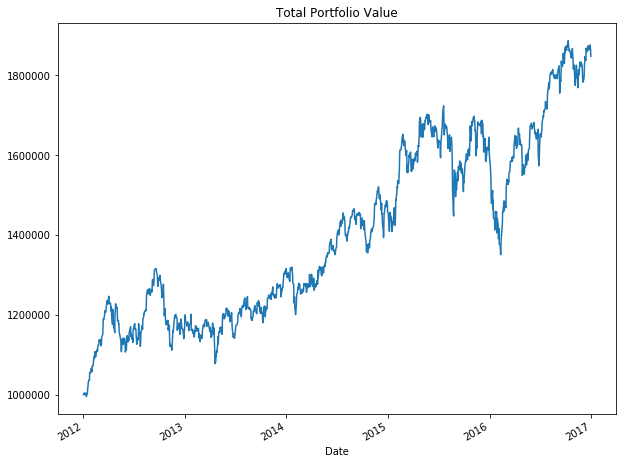

In [32]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title("Total Portfolio Value");

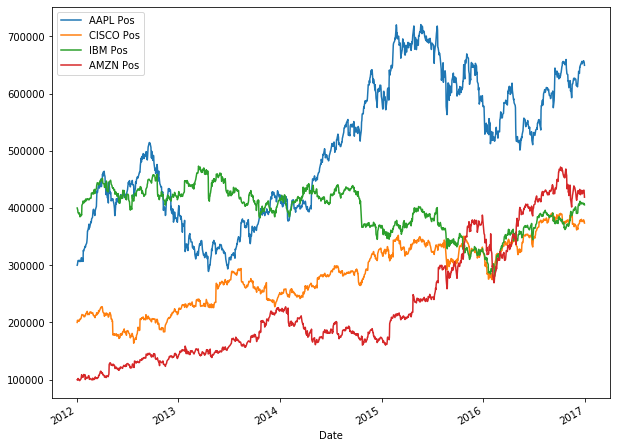

In [33]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8));

## Part 2

In [34]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [35]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [36]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [37]:
portfolio_val['Daily Return'].std()

0.010568287769161725

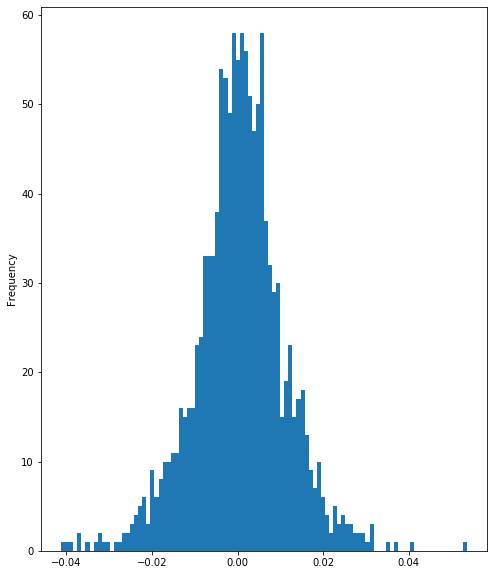

In [39]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100,figsize=(8,10));

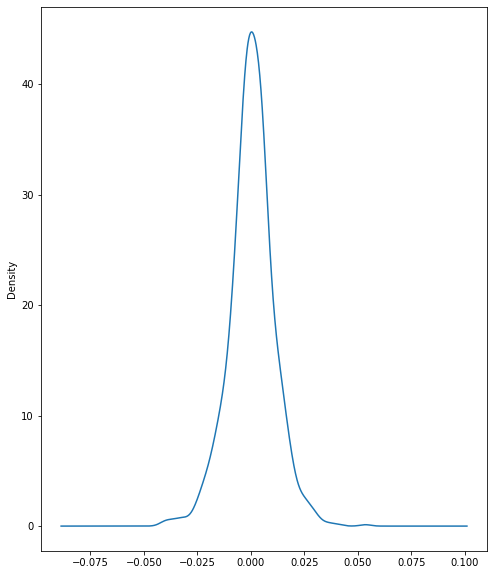

In [40]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(8,10));

In [42]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] - 1)
cumulative_return

84.74285181665545

In [47]:
## Sharpe Ratio
## Risk adjusted return
## mean portfolio - risk free rate divided by std
# risk free rate of return is assumed to be zero, if FED raises rates it will increase

In [46]:
SR = 0 + portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
SR

0.05149680662648089

In [48]:
annualized_sharpe_ratio = (252**0.5) * SR
annualized_sharpe_ratio

0.817486461885909